In [13]:
import numpy as np
import matplotlib.pyplot as plt

(100,)
(100, 1)
(100, 1)


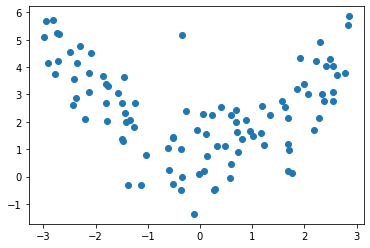

In [14]:
# create quadratic function data.

#uniform distribution data.
random_X = np.random.uniform(-3, 3, size=100)
print(random_X.shape)
# column and row reverse for one-dimension ndarray
reshaped_X = random_X.reshape(-1,1)
print(reshaped_X.shape)
#y=0.5x^2 + b + 1
y=0.5*reshaped_X**2 + 1 + np.random.normal(0, 1, size=(100,1))
print(y.shape)

plt.scatter(reshaped_X, y)
plt.show()



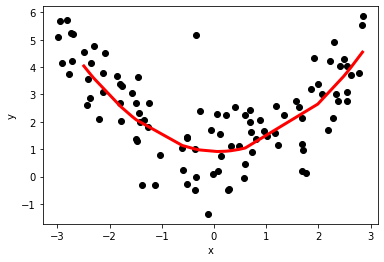

Model Accuracy:  0.5821302066732505    0.6435203829150944


In [18]:
#-----use data to train the Polynomial regression model.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

train_X,test_X, train_y, test_y =\
train_test_split(reshaped_X, y, test_size=0.2, random_state=0)
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(np.array(train_X), train_y)
p_pred=pipeline.predict(test_X)
df = pd.DataFrame({'x': test_X[:,0], 'y': p_pred[:,0]})
values = df.sort_values(by='x', inplace=True)

points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="red", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reshaped_X,y, color="black")
plt.show()

accuracy_score_train = pipeline.score(train_X,train_y)
accuracy_score_test = pipeline.score(test_X,test_y)
print('Model Accuracy: ', accuracy_score_train, '  ', accuracy_score_test)